# Experimentation Only

In [2]:
import sys
!{sys.executable} -m pip install tqdm

You are using pip version 9.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from datetime import datetime
import datetime as dt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#For Prediction
from sklearn import metrics
from sklearn import preprocessing, cross_validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.layers import Dense, Dropout, Input, LSTM, Activation, Flatten, TimeDistributed
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm, tqdm_notebook
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.sequence import pad_sequences

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# Read Datasets 
#research_data_raw = pd.read_csv('Datasets/bitcoin_research_data_v2.csv')
# Drop unnecessary columns
#research_data = research_data_raw.drop('Unnamed: 0', axis=1)
research_data = pd.read_csv('Datasets/BlockChain_Train_csv.csv')
#research_data.fillna(0, inplace=True)
research_data.head()

,Date,Close,USD_Exchange_Trade_Volume,Bitcoins_in_circulation,MarketCap,BlockSize,AvgBlockSize,Orphaned_Block,TransactionsPerBlock,MedianTransactCnfmTime,...,USD/JPY,USD/CHF,USD/KRW,USD/GBP,EUR/KRW,USD/CNY,Google Trends Interest,GTrends Normalized,US Federal funds rate,Breakeven Inflation Rate
0,3-Jan-09,0.0,0.0,50.0,0.0,0.0,0.0,0,1.0,0.0,...,90.73,1.06,1269.75,0.69,1774.86,6.83,0,0.0,0.08,0.15
1,5-Jan-09,0.0,0.0,50.0,0.0,0.0,0.0,0,1.0,0.0,...,92.08,1.08,1326.15,0.69,1843.95,6.82,0,0.0,0.11,0.15
2,7-Jan-09,0.0,0.0,50.0,0.0,0.0,0.0,0,1.0,0.0,...,93.79,1.12,1305.55,0.67,1763.60,6.84,0,0.0,0.11,0.47
3,9-Jan-09,0.0,0.0,750.0,0.0,0.0,0.0,0,1.0,0.0,...,91.24,1.10,1324.45,0.66,1808.74,6.83,0,0.0,0.09,0.56
4,11-Jan-09,0.0,0.0,7600.0,0.0,0.0,0.0,0,1.0,0.0,...,91.24,1.10,1324.45,0.66,1808.74,6.83,0,0.0,0.09,0.56


In [5]:
research_data.tail()

,Date,Close,USD_Exchange_Trade_Volume,Bitcoins_in_circulation,MarketCap,BlockSize,AvgBlockSize,Orphaned_Block,TransactionsPerBlock,MedianTransactCnfmTime,...,USD/JPY,USD/CHF,USD/KRW,USD/GBP,EUR/KRW,USD/CNY,Google Trends Interest,GTrends Normalized,US Federal funds rate,Breakeven Inflation Rate
1768,9-Sep-18,6286.43,291261346.9,17259100.0,1.080000e+11,181951.87,0.62,0,1158.97,7.03,...,111.01,0.97,1128.55,0.77,1305.90,6.84,54,0.54,1.92,2.10
1769,11-Sep-18,6296.32,290980772.8,17262550.0,1.090000e+11,182206.04,0.94,0,1684.90,10.53,...,111.59,0.97,1125.80,0.77,1304.82,6.88,65,0.65,1.92,2.12
1770,13-Sep-18,6450.18,321882304.6,17266500.0,1.110000e+11,182446.38,0.82,0,1582.49,8.08,...,111.86,0.97,1120.89,0.76,1309.12,6.86,65,0.65,1.92,2.10
1771,15-Sep-18,6518.66,360631436.3,17269900.0,1.130000e+11,182696.55,0.79,0,1507.65,9.03,...,112.06,0.97,1121.43,0.77,1304.73,6.87,50,0.50,1.92,2.10
1772,17-Sep-18,6400.60,181083665.0,17273325.0,1.110000e+11,182906.28,0.91,0,1778.90,9.37,...,111.98,0.96,1124.70,0.76,1314.71,6.88,58,0.58,1.92,2.10


In [6]:
len(research_data)

1773

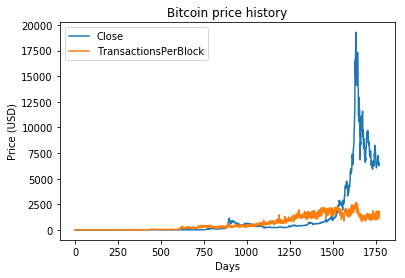

In [7]:
# plt.figure()
# plt.plot(research_data["Close"])
# plt.plot(research_data["High"])
# plt.plot(research_data["Low"])
# plt.plot(research_data["Close"])
# plt.title('Bitcoin price history')
# plt.ylabel('Price (USD)')
# plt.xlabel('Days')
# plt.legend(['Open','High','Low','Close'], loc='upper left')
# plt.show()

plt.figure()
plt.plot(research_data["Close"])
plt.plot(research_data["TransactionsPerBlock"])
plt.title('Bitcoin price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Close','TransactionsPerBlock'], loc='upper left')
plt.show()

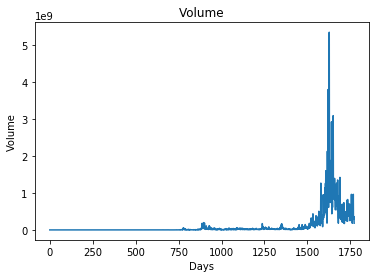

In [8]:
plt.figure()
plt.plot(research_data["USD_Exchange_Trade_Volume"])
plt.title('Volume')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

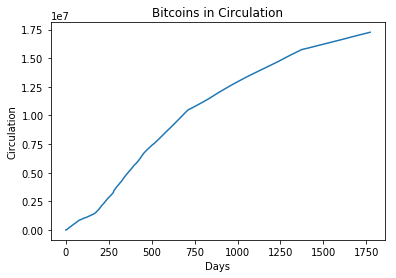

In [9]:
plt.figure()
plt.plot(research_data["Bitcoins_in_circulation"])
plt.title('Bitcoins in Circulation')
plt.ylabel('Circulation')
plt.xlabel('Days')
plt.show()

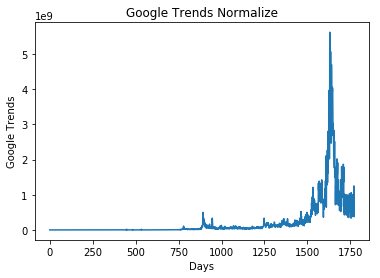

In [10]:
plt.figure()
plt.plot(research_data["Estimated_Transaction_Value_USD"])
plt.title('Google Trends Normalize')
plt.ylabel('Google Trends')
plt.xlabel('Days')
plt.show()

In [11]:
print("checking if any null values are present\n", research_data.isna().sum())

checking if any null values are present
 Date                                                 0
Close                                                0
USD_Exchange_Trade_Volume                            0
Bitcoins_in_circulation                              0
MarketCap                                            0
BlockSize                                            0
AvgBlockSize                                         0
Orphaned_Block                                       0
TransactionsPerBlock                                 0
MedianTransactCnfmTime                               0
Hash_Rate                                            0
Difficulty                                           0
MinersRevenue                                        0
TransactionFees_BTC                                  0
TransactionFees_USD                                  0
Cost%ofTransactionVolume                             0
CostPerTransaction                                   0
Unique_Addresses        

In [12]:
# Normalize and convert DataFrame into ndArray
# train_cols = ["Open","High","Low","Close","Volume USD","Popularity_Normalized"]
train_cols = ["Close","TransactionsPerBlock","USD_Exchange_Trade_Volume","BlockSize_d","Total_Number_of_Transactions_d","Estimated_Transaction_Value_USD"]
# train_cols = ["Close"]

df_train, df_test = train_test_split(research_data, train_size=0.8, test_size=0.2, shuffle=False)
print("Train and Test size", len(df_train), len(df_test))

# scale the feature MinMax, build array
x = df_train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(df_test.loc[:,train_cols])

Train and Test size 1418 355


In [39]:
TIME_STEPS = 5
BATCH_SIZE = 16
LR = 0.005
# epochs = 150
EPOCHS = 50

In [40]:
def build_timeseries(mat, y_col_index):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    
    for i in tqdm_notebook(range(dim_0)):
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[TIME_STEPS+i, y_col_index]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y

In [41]:
def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

In [42]:
x_t, y_t = build_timeseries(x_train, 0) # index of output (3)
x_t = trim_dataset(x_t, BATCH_SIZE)
y_t = trim_dataset(y_t, BATCH_SIZE)
x_temp, y_temp = build_timeseries(x_test, 0) # index of output (3)
x_val, x_test_t = np.split(trim_dataset(x_temp, BATCH_SIZE),2)
y_val, y_test_t = np.split(trim_dataset(y_temp, BATCH_SIZE),2)

HBox(children=(IntProgress(value=0, max=1413), HTML(value='')))


length of time-series i/o (1413, 5, 6) (1413,)


HBox(children=(IntProgress(value=0, max=350), HTML(value='')))


length of time-series i/o (350, 5, 6) (350,)


In [43]:
# lstm_model = Sequential()
# lstm_model.add(LSTM(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True,     kernel_initializer='random_uniform'))
# lstm_model.add(Dropout(0.5))
# lstm_model.add(Dense(20,activation='relu'))
# lstm_model.add(Dense(1,activation='sigmoid'))
# optimizer = RMSprop(lr=LR)
# lstm_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

# lstm_model = Sequential()
# lstm_model.add(LSTM(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True, kernel_initializer='random_uniform', return_sequences=True))
# lstm_model.add(Dropout(0.5))
# lstm_model.add(LSTM(32, return_sequences=True))
# #lstm_model.add(Dense(20,activation='relu'))
# lstm_model.add(LSTM(16, return_sequences=False))
# lstm_model.add(Dropout(0.5))
# lstm_model.add(Dense(1,activation='sigmoid'))
# optimizer = RMSprop(lr=LR, decay=3e-8)
# lstm_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

# BEST SO FAR
# lstm_model = Sequential()
# lstm_model.add(LSTM(32, input_shape=(TIME_STEPS, x_t.shape[2]), return_sequences=True))
# lstm_model.add(Dropout(0.4))
# lstm_model.add(LSTM(16, return_sequences=False))
# lstm_model.add(Dense(1))
# lstm_model.add(Activation('tanh'))
# optimizer = RMSprop(lr=0.005, clipvalue=1.)
# lstm_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

# lstm_model = Sequential()
# lstm_model.add(LSTM(512, input_shape=(TIME_STEPS, x_t.shape[2]), return_sequences=True))
# lstm_model.add(Dropout(0.3))
# lstm_model.add(LSTM(256, return_sequences=True))
# lstm_model.add(Dropout(0.6))
# lstm_model.add(LSTM(128, return_sequences=True))
# lstm_model.add(LSTM(64, return_sequences=True))
# lstm_model.add(Dropout(0.8))
# lstm_model.add(LSTM(32, return_sequences=True))
# lstm_model.add(LSTM(16, return_sequences=True))
# lstm_model.add(Dropout(0.1))
# lstm_model.add(LSTM(8, return_sequences=False))
# lstm_model.add(Dense(1))
# lstm_model.add(Activation('tanh'))
# optimizer = RMSprop(lr=0.0001, clipvalue=1.)
# lstm_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

# lstm_model = Sequential()
# lstm_model.add(LSTM(16, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True, kernel_initializer='random_uniform', return_sequences=True))
# lstm_model.add(LSTM(8, return_sequences=False))
# lstm_model.add(Dropout(0.5))
# lstm_model.add(Dense(1,activation='linear'))
# optimizer = RMSprop(lr=LR, decay=3e-8)
# lstm_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Recurrent layer - DID GOOD GIVEN THE CONDITIONS
# lstm_model = Sequential()
# lstm_model.add(LSTM(64, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]), return_sequences=False, 
#                dropout=0.1, recurrent_dropout=0.1))
# lstm_model.add(Dense(64, activation='linear'))
# lstm_model.add(Dropout(0.5))
# lstm_model.add(Dense(1, activation='linear'))
# lstm_model.compile(
#     optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

lstm_model = Sequential()
lstm_model.add(LSTM(16, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True, kernel_initializer='random_uniform', return_sequences=True))
lstm_model.add(Dense(8,activation='relu'))
lstm_model.add(Dropout(0.7))
lstm_model.add(LSTM(8, return_sequences=False))
lstm_model.add(Dense(1,activation='sigmoid'))
optimizer = RMSprop(lr=LR, decay=3e-8)
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])


In [44]:
# csv_logger = CSVLogger(os.path.join(OUTPUT_PATH, 'your_log_name' + '.log'), append=True)

# history = model.fit(x_t, y_t, epochs=your_epochs, verbose=2, batch_size=BATCH_SIZE,
#                    shuffle=False, validation_data=(trim_dataset(x_val, BATCH_SIZE),
#                    trim_dataset(y_val, BATCH_SIZE)), callbacks=[csv_logger])

history = lstm_model.fit(x_t, y_t, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    shuffle=False, validation_data=(trim_dataset(x_val, BATCH_SIZE),
                    trim_dataset(y_val, BATCH_SIZE)))

Train on 1408 samples, validate on 160 samples
Epoch 1/50
1408/1408 [==============================] - 2s 2ms/step - loss: 0.0352 - acc: 0.1960 - val_loss: 1.6792 - val_acc: 0.0000e+00
Epoch 2/50
1408/1408 [==============================] - 1s 464us/step - loss: 0.0239 - acc: 0.1982 - val_loss: 1.7226 - val_acc: 0.0000e+00
Epoch 3/50
1408/1408 [==============================] - 1s 474us/step - loss: 0.0169 - acc: 0.2024 - val_loss: 1.6887 - val_acc: 0.0000e+00
Epoch 4/50
1408/1408 [==============================] - 1s 521us/step - loss: 0.0122 - acc: 0.2038 - val_loss: 1.6877 - val_acc: 0.0000e+00
Epoch 5/50
1408/1408 [==============================] - 1s 766us/step - loss: 0.0100 - acc: 0.2031 - val_loss: 1.6637 - val_acc: 0.0000e+00
Epoch 6/50
1408/1408 [==============================] - 1s 807us/step - loss: 0.0091 - acc: 0.2053 - val_loss: 1.6476 - val_acc: 0.0000e+00
Epoch 7/50
1408/1408 [==============================] - 1s 786us/step - loss: 0.0092 - acc: 0.1996 - val_loss: 1.65

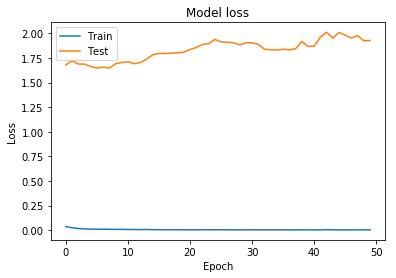

In [45]:
# Visualize the training data
from matplotlib import pyplot as plt
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test', 'Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#plt.savefig(os.path.join(OUTPUT_PATH, 'train_vis_BS_'+str(BATCH_SIZE)+"_"+time.ctime()+'.png'))


In [46]:
y_pred = lstm_model.predict(trim_dataset(x_test_t, BATCH_SIZE), batch_size=BATCH_SIZE)
y_pred = y_pred.flatten()
y_test_t = trim_dataset(y_test_t, BATCH_SIZE)
error = metrics.mean_squared_error(y_test_t, y_pred)
print("Error is", error, y_pred.shape, y_test_t.shape)
print(y_pred[0:15])
print(y_test_t[0:15])

Error is 60.811803001752466 (160,) (160,)
[0.40400898 0.4040972  0.40551883 0.404779   0.40437818 0.40443438
 0.40472874 0.4050721  0.40466654 0.40445676 0.40471992 0.4048784
 0.40561822 0.40489328 0.40513837]
[3.45574283 3.1602954  3.21723719 3.39731538 3.6507298  3.76661164
 3.81136403 3.6708775  3.77549957 3.99850565 4.1548914  4.62652476
 4.98648132 4.96195482 4.81857515]


In [47]:
# convert the predicted value to range of real data
y_pred_org = (y_pred * min_max_scaler.data_range_[0]) + min_max_scaler.data_min_[0]
# min_max_scaler.inverse_transform(y_pred)
y_test_t_org = (y_test_t * min_max_scaler.data_range_[0]) + min_max_scaler.data_min_[0]
# min_max_scaler.inverse_transform(y_test_t)
print(y_pred_org[0:15])
print(y_test_t_org[0:15])

[465.01434 465.11588 466.75217 465.9006  465.43927 465.50397 465.84277
 466.23798 465.77118 465.52972 465.83264 466.01505 466.86658 466.03217
 466.31427]
[3977.56 3637.5  3703.04 3910.31 4201.99 4335.37 4386.88 4225.18 4345.6
 4602.28 4782.28 5325.13 5739.44 5711.21 5546.18]


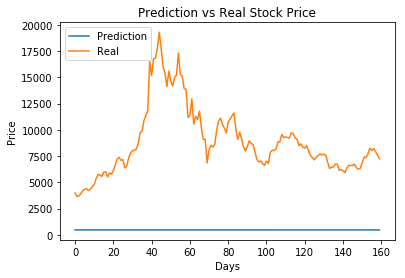

In [48]:
# Visualize the prediction
from matplotlib import pyplot as plt
plt.figure()
plt.plot(y_pred_org)
plt.plot(y_test_t_org)
plt.title('Prediction vs Real Stock Price')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Prediction', 'Real'], loc='upper left')
plt.show()
#plt.savefig(os.path.join(OUTPUT_PATH, 'pred_vs_real_BS'+str(BATCH_SIZE)+"_"+time.ctime()+'.png'))